# **Adult Income Dataset (Census Income)** #

## **Project Overview** ##

The UCI Adult dataset, also known as the "Census Income" dataset, is a **binary classification** task in machine learning. It contains demographic information on individuals and is typically used to predict whether a person earns more than $50,000 per year based on features like age, education, work hours, occupation and so on.

The main objective of the project is to classify whether an individual's income is greater than or less than $50,000. 

This is a **supervised learning** task where the target variable (income) is binary (<=50K or >50K). The dataset contains both continuous and categorical variables, which can be used to build machine learning models.

## **Project Goal** ##

The goal of the project is to build a machine learning model that not only classifies individuals as earning either above or below $50,000 but also does so with high accuracy and interpretability, helping to understand the factors that contribute to income disparities.

## **Data** ##

The data for this project comes from the UCI Machine Learning Repository and is known as the "Adult" or "Census Income" dataset. It was originally extracted from the 1994 U.S. Census Bureau's Current Population Survey (CPS). This survey collects a wide range of demographic and employment data from U.S. households and is often used for research in areas such as income inequality and labor market analysis.

The dataset consists of 48,842 records with 14 attributes, including age, workclass, education, marital status, occupation, race, gender, and native country. The target variable is binary, representing whether an individual's income exceeds $50,000 per year.

This data is publicly available and can be accessed freely for research and educational purposes.

**APA Citation:**
Dua, D., & Graff, C. (2019). UCI Machine Learning Repository: Adult Data Set. University of California, Irvine, School of Information and Computer Sciences. https://archive.ics.uci.edu/ml/datasets/adult

**Loading the data**

In [339]:
!pip install xgboost
!pip install imbalanced-learn
!pip install ucimlrepo
!pip install tabulate

In [340]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate

from ucimlrepo import fetch_ucirepo
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, roc_curve, auc,
                             ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore, chi2_contingency, ttest_ind
from scipy.stats import randint

In [341]:
#fetching dataset and creating a dataframe
adult = fetch_ucirepo(id=2) 
adultDataFrame = adult.data.original
adultDataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [342]:
#displaying the summary of the dataset
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


This dataset consists of 48,842 instances and 14 features. The data contains both categorical and numerical features that describe demographic and employment-related information about individuals. Here's a breakdown of the data:

Size:
48,842 rows (instances)
14 columns (attributes): 6 numerical, 8 categorical.

- age: Describes the age of individuals. Continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

## **Data Cleaning and Preprocessing** ##

In [343]:
#identifying missing values ('?' is treated as missing value in this dataset)
missing_data = adultDataFrame[adultDataFrame.isin(['?']).any(axis=1)]
#print(missing_data)
#replacing ? with NaN in the dataset
adultDataFrame.replace('?', np.nan, inplace=True)
#adultDataFrame[adultDataFrame.isin(['?']).any(axis=1)]

In most machine learning workflows, missing data should be standardized as NaN. This allows for consistent handling of missing values across different functions and algorithms. The UCI Adult dataset uses '?' to denote missing data, so replacing '?' with NaN ensures that missing values are properly recognized by Python libraries like pandas, sklearn, and others.

In [344]:
#cleaning values in income column
adultDataFrame['income'].replace('<=50K.', '<=50K',inplace = True)
adultDataFrame['income'].replace('>50K.', '>50K',inplace = True)
#adultDataFrame['income'].value_counts()

In many datasets, especially those derived from surveys or data entry, formatting inconsistencies can arise. The trailing periods (.) in the income labels can lead to unexpected behavior in data analysis and model training. By standardizing these values, we ensure that they are consistent and properly formatted.

In [345]:
#removing duplicate rows
#print("Duplicate Rows:\n", adultDataFrame.duplicated().sum())
duplicates  = adultDataFrame[adultDataFrame.duplicated()]
#duplicates
#drop duplicates
adultDataFrame.drop_duplicates(inplace=True)

Removing the duplicate rows ensures that each row represents a unique observation, which enhances the accuracy and reliability of any analysis performed on the data.

In [346]:
#function to categorize grade levels in education column
def categorize_grade(grade):
    if grade in ['Preschool', '1st-4th']:
        return 'Elementary'
    elif grade in ['5th-6th', '7th-8th']:
        return 'Middle School'
    elif grade in ['9th', '10th', '11th', '12th']:
        return 'Not HS-grad'
    else:
        return grade
        
#applying the function to categorize grade levels
adultDataFrame['education_category'] = adultDataFrame['education'].apply(categorize_grade)
#print(adultDataFrame)
adultDataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Not HS-grad
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,Bachelors
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,HS-grad
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,Bachelors
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,Bachelors


Categorizing the education column into broader categories simplifies the data, enhances interpretability, and makes the dataset easier to analyze or use in predictive models. This preprocessing step contributes to better data quality and more meaningful insights from the dataset.

In [347]:
#define bins and labels for age categories
bins = [0, 13, 20, 35, 61, 100]  # Age intervals
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  # Corresponding labels

#use pd.cut to categorize the age into groups
adultDataFrame['age_group'] = pd.cut(adultDataFrame['age'], bins=bins, labels=labels, right=False)

#display the DataFrame
print(adultDataFrame)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

age is a continuous variable with many unique values. By converting it into categories, we simplify the dataset and make it easier to analyze and interpret.

In [348]:
#now drop the columns which are not necessary
adultDataFrame.drop(columns=['fnlwgt','education','education-num','age'], inplace=True)

Dropping the columns which are not necessary. fnlwgt column is a cencus adjustment value and it is not necessary for our analysis. New education_category and age_group columns are created so dropping the education, education-num and age columns.

In [349]:
adultDataFrame.loc[adultDataFrame['workclass'] == 'Never-worked', 'hours-per-week'] = 0

In [350]:
#detecting the outliers using Z-score
checkVisualisedf = adultDataFrame
#select numeric columns
numeric_columns = ['capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
z_scores = numeric_data.apply(zscore).abs()
print(z_scores)
threshold = 3

#display the outliers
outliers_list = {}
for col in numeric_columns:
    #identify outliers in the column
    is_outlier = z_scores[col] > threshold
    outliers_in_col = numeric_data[col][is_outlier]
    
    #store outliers in the list
    outliers_list[col] = outliers_in_col
    
    #print results
    num_outliers = len(outliers_in_col)
    print(f"Outliers in '{col}': {num_outliers} found.")

       capital-gain  capital-loss  hours-per-week
0          0.146702      0.217248        0.033858
1          0.144882      0.217248        2.210621
2          0.144882      0.217248        0.033858
3          0.144882      0.217248        0.033858
4          0.144882      0.217248        0.033858
...             ...           ...             ...
48837      0.144882      0.217248        0.356341
48838      0.144882      0.217248        0.033858
48839      0.144882      0.217248        0.772351
48840      0.586760      0.217248        0.033858
48841      0.144882      0.217248        1.578559

[48790 rows x 3 columns]
Outliers in 'capital-gain': 331 found.
Outliers in 'capital-loss': 2216 found.
Outliers in 'hours-per-week': 691 found.


In the above cell, we are detecting the outliers by using z score method.

In [351]:
#cap 'hours-per-week' to 80
adultDataFrame['hours-per-week'] = adultDataFrame['hours-per-week'].apply(lambda x: 80 if x > 80 else x)

#verify the changes
#print(adultDataFrame['hours-per-week'].unique())

The code in the above cell ensures that any individual who reports working more than 80 hours per week has their value capped at 80. This reduces the impact of outliers and ensures the data remains more consistent and realistic for analysis. 

In [352]:
adultDataFrame.isnull().sum()

workclass             2795
marital-status           0
occupation            2805
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country         856
income                   0
education_category       0
age_group                0
dtype: int64

**Imputing missing values in workclass and occupation column**

Imputing missing values only for workclass and occupation columns, because we will be dropping the native-country column after feature selection process.

In [353]:
#initialize a dictionary to store LabelEncoder for each column
label_encoders = {}

#apply label encoding and store encoders for each column
for col in columns_to_encode:
    le = LabelEncoder()  # Initialize a new LabelEncoder for each column
    adultDataFrame[col] = le.fit_transform(adultDataFrame[col])
    label_encoders[col] = le  # Store the LabelEncoder for this column
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

#separate rows with and without missing values in 'occupation', 14 is mapping to null(after encoding)
df_missing =  adultDataFrame[adultDataFrame['occupation'] == 14]
df_not_missing =  adultDataFrame[adultDataFrame['occupation'] != 14]

#imputing missing values in occupation
X =  df_not_missing.drop(columns=['occupation'])
y = df_not_missing['occupation'] 


#split the non-missing data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#use the trained model to predict the 'occupation' for rows with missing values
X_missing = df_missing.drop(columns=['occupation'])
df_missing['occupation'] = rf.predict(X_missing)

df_imputed = pd.concat([df_not_missing, df_missing])

adultDataFrame=df_imputed.copy()

#separate rows with and without missing values in 'workclass', 8 is mapping to null(after encoding)
df_missing =  adultDataFrame[adultDataFrame['workclass'] == 8]
df_not_missing =  adultDataFrame[adultDataFrame['workclass'] != 8]

#imputing missing values in workclass
X =  df_not_missing.drop(columns=['workclass'])
y = df_not_missing['workclass']

#split the non-missing data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#use the trained model to predict the 'workclass' for rows with missing values
X_missing = df_missing.drop(columns=['workclass']) 
df_missing['workclass'] = rf.predict(X_missing)

df_imputed = pd.concat([df_not_missing, df_missing])

adultDataFrame=df_imputed.copy()


In [354]:
adultDataFrame_encoded = adultDataFrame.copy()
adultDataFrame_encoded

,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_category,age_group
0,6,4,0,1,4,1,2174,0,40,38,0,2,0
1,5,2,3,0,4,1,0,0,13,38,0,2,0
2,3,0,5,1,4,1,0,0,40,38,0,5,0
3,3,2,5,0,2,1,0,0,40,38,0,8,0
4,3,2,9,5,2,0,0,0,40,4,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,3,2,13,0,4,1,0,0,14,38,0,10,1
48769,3,4,0,3,4,0,0,0,30,38,0,10,3
48800,4,2,2,0,4,1,0,0,25,1,0,5,1
48812,5,2,3,0,4,1,2936,0,20,38,0,1,1


Imputed the missing values using random forest classifier algorithm by considering not missing values as train and test data for both workclass and occupation columns.

In [355]:
#after imputing missing values for 'occupation' and 'workclass' decode them back to original values
adultDataFrame['decoded_occupation'] = label_encoders['occupation'].inverse_transform(adultDataFrame['occupation'])
adultDataFrame['decoded_workclass'] = label_encoders['workclass'].inverse_transform(adultDataFrame['workclass'])
adultDataFrame['decoded_age_group'] = label_encoders['age_group'].inverse_transform(adultDataFrame['age_group'])
adultDataFrame['decoded_marital-status'] = label_encoders['marital-status'].inverse_transform(adultDataFrame['marital-status'])
adultDataFrame['decoded_relationship'] = label_encoders['relationship'].inverse_transform(adultDataFrame['relationship'])
adultDataFrame['decoded_race'] = label_encoders['race'].inverse_transform(adultDataFrame['race'])
adultDataFrame['decoded_sex'] = label_encoders['sex'].inverse_transform(adultDataFrame['sex'])
adultDataFrame['decoded_education_category'] = label_encoders['education_category'].inverse_transform(adultDataFrame['education_category'])
adultDataFrame['decoded_native-country'] = label_encoders['native-country'].inverse_transform(adultDataFrame['native-country'])
adultDataFrame['decoded_income'] = label_encoders['income'].inverse_transform(adultDataFrame['income'])

#taking all the decoded columns and the numerical columns into a new dataset for EDA.
df = adultDataFrame[['decoded_age_group','decoded_workclass','decoded_education_category',
                    'decoded_marital-status','decoded_occupation','decoded_relationship','decoded_race',
                    'decoded_sex','capital-gain','capital-loss','hours-per-week','decoded_native-country',
                    'decoded_income']]
df.columns =['age-group','workclass','education-category','marital-status','occupation','relationship','race','sex',
     'capital-gain','capital-loss','hours-per-week','native-country','income']
df


,age-group,workclass,education-category,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,Adult,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Adult,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Adult,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Adult,Private,Not HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Young Adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,Senior,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,14,United-States,<=50K
48769,Young Adult,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
48800,Senior,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,25,Canada,<=50K
48812,Senior,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male,2936,0,20,United-States,<=50K


## **Exploratory Data Analysis** ##

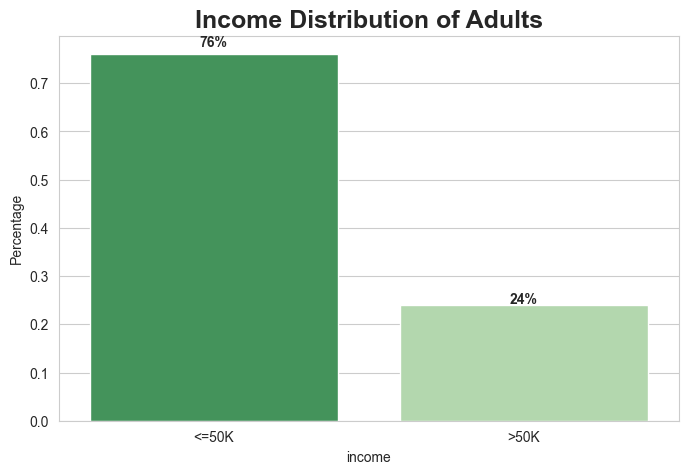

In [356]:
#income distribution of adults
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Observation: The number of people earning more than 50K dollars an year is one third of the people earning less than it.
We should also keep in mind that this data was collected in 1996, so 50K dollars of that tme, might not be the same in today's time!

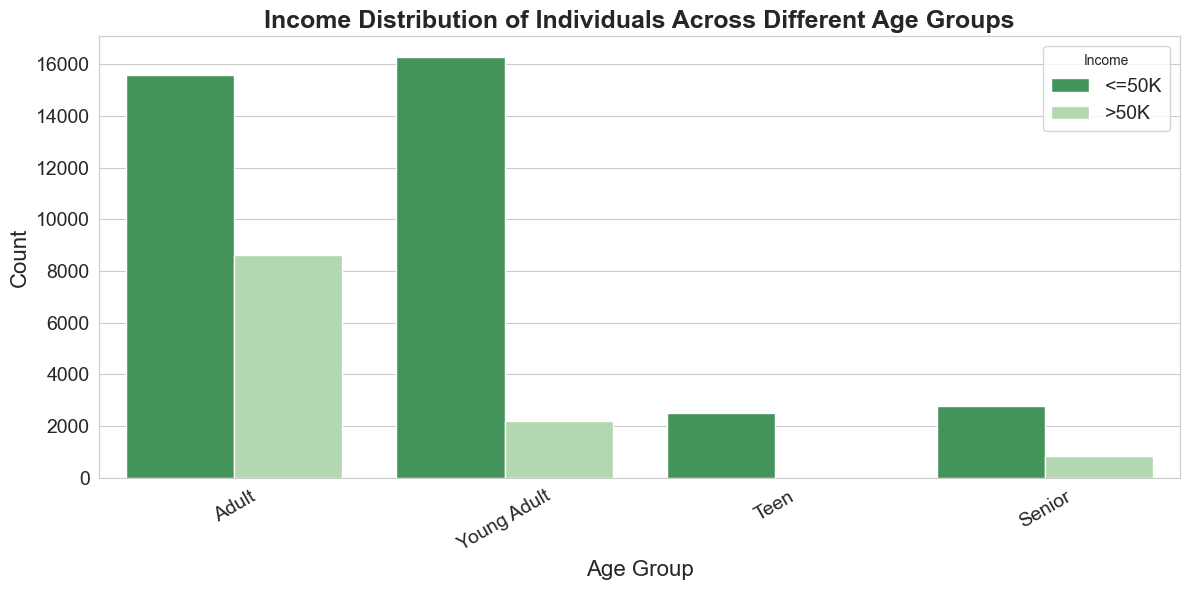

In [357]:
#income distribution of individuals across different age groups
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='age-group', hue='income', palette='Greens_r')

plt.title('Income Distribution of Individuals Across Different Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation: 
We see that people earning more than 50K dollars increase as the age increases upto a certain extent. As one might imagine, the number of people earning more than 50K is quite negligible among Teen age-group. For the people of age group in Adult and Young Adult, the number of people earning more than 50K is quite comparable to those earning less than it!

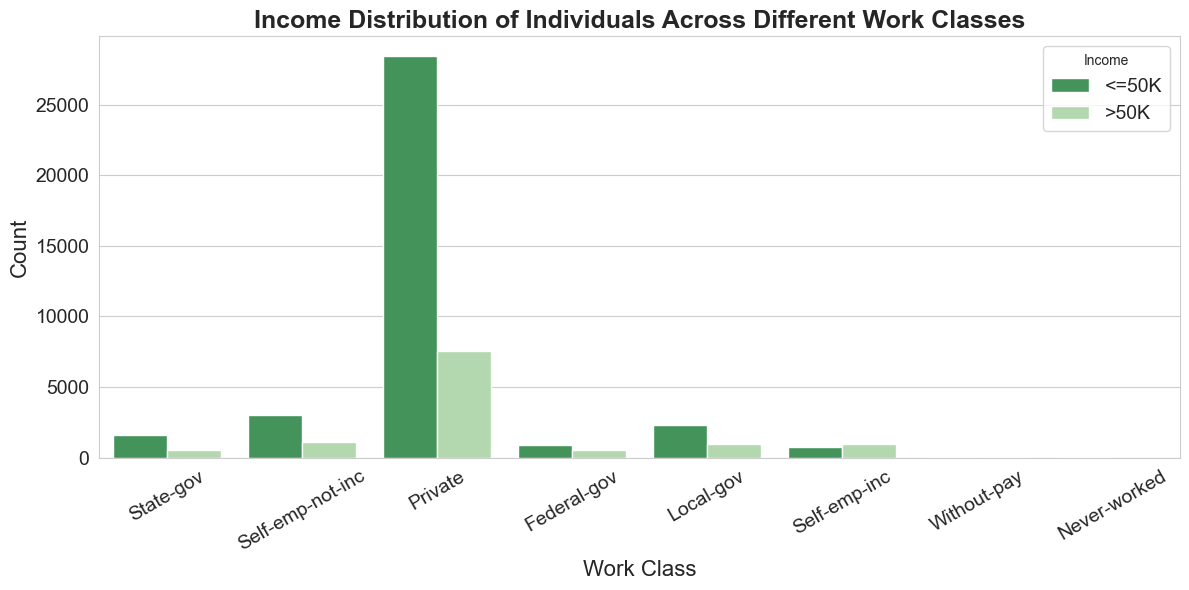

In [358]:
#income distribution of individuals across different work classes
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='workclass', hue='income', palette='Greens_r')

plt.title('Income Distribution of Individuals Across Different Work Classes', fontsize=18, fontweight='bold')
plt.xlabel('Work Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation: 
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
- There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

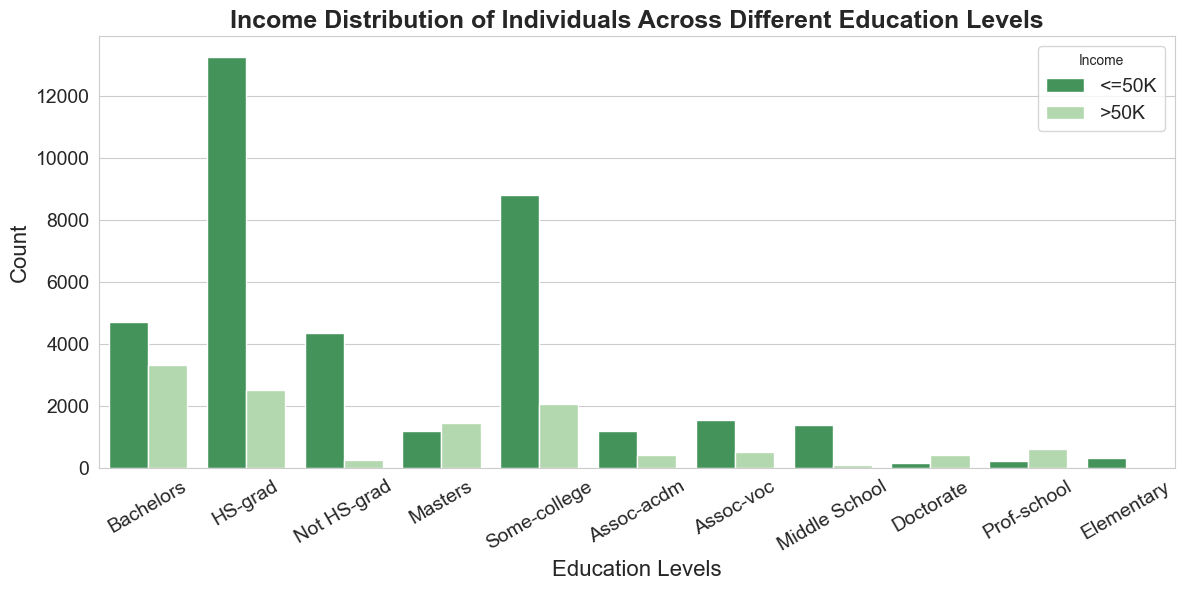

In [359]:
#income distribution of individuals across different education levels
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='education-category', hue='income', palette='Greens_r')

plt.title('Income Distribution of Individuals Across Different Education Levels', fontsize=18, fontweight='bold')
plt.xlabel('Education Levels', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation: 
- For the people who did theie HS graduation, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
- For the people belonging to Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

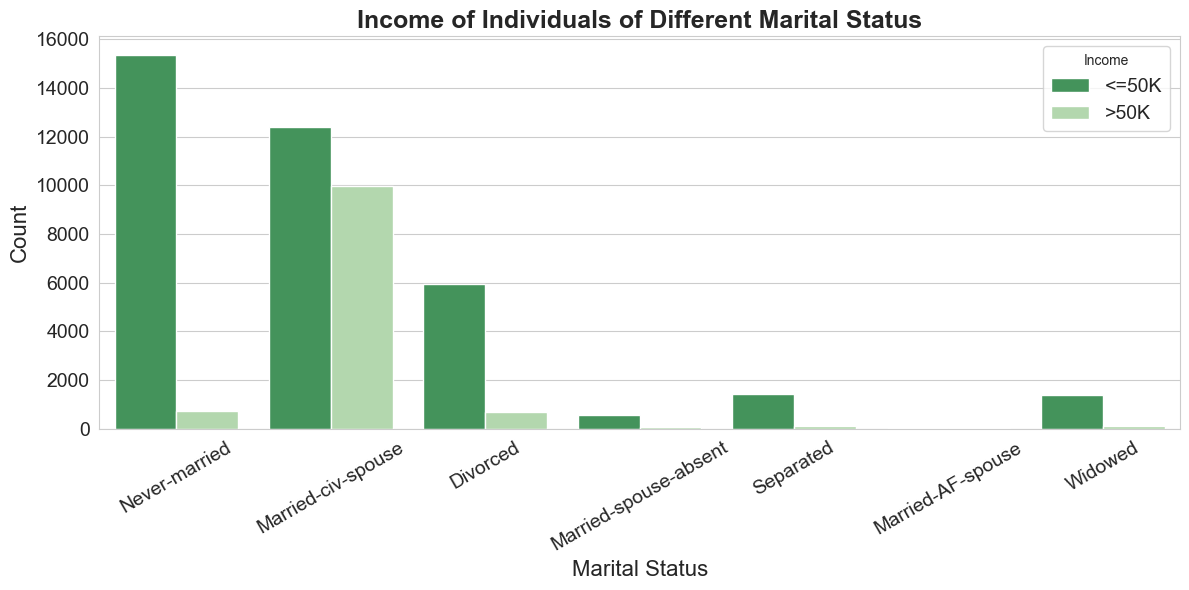

In [360]:
#income distribution of individuals across different marital status
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='marital-status', hue='income', palette='Greens_r')

plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation: 
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

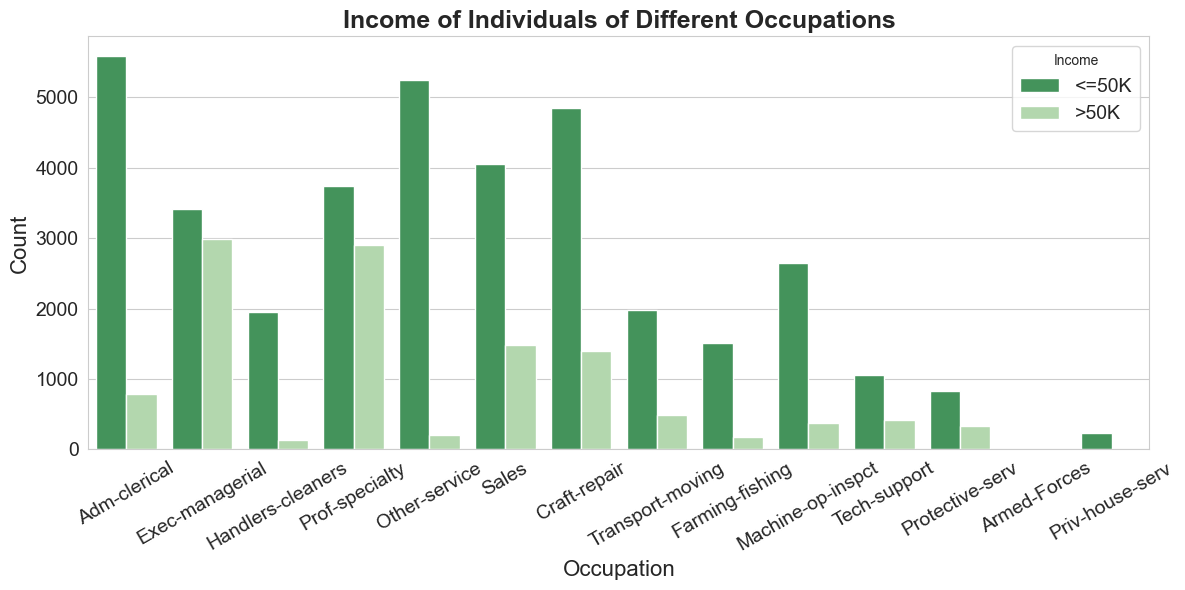

In [361]:
#income distribution of individuals across different occupations
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='occupation', hue='income', palette='Greens_r')

plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation:
- Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

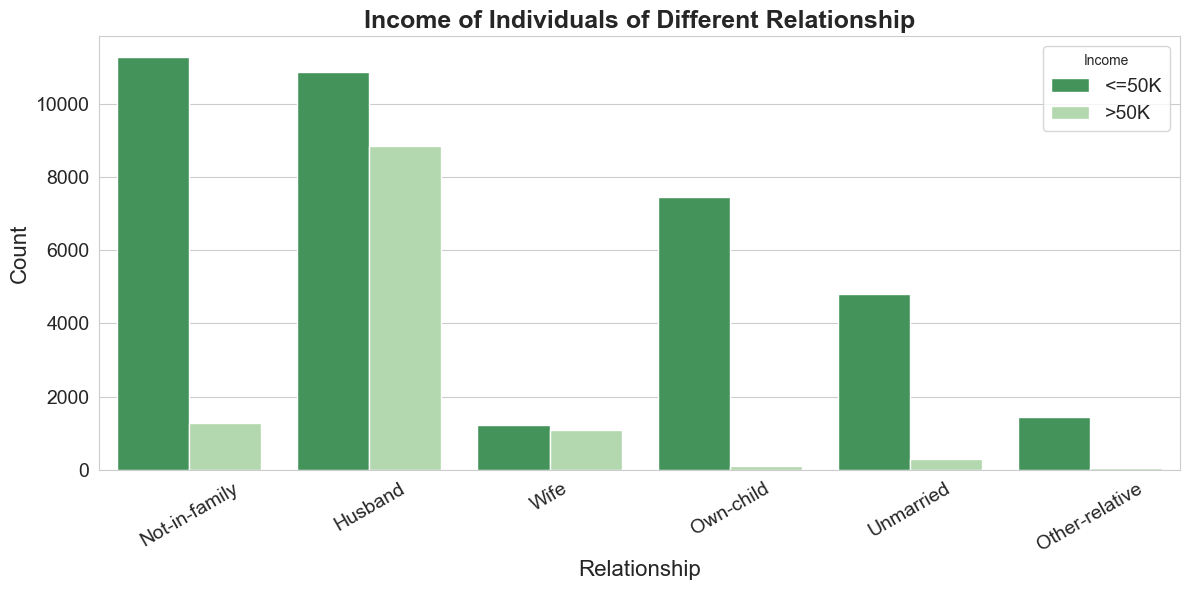

In [362]:
#income distribution of individuals across different relationship
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='relationship', hue='income', palette='Greens_r')

plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xlabel('Relationship', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation:
- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

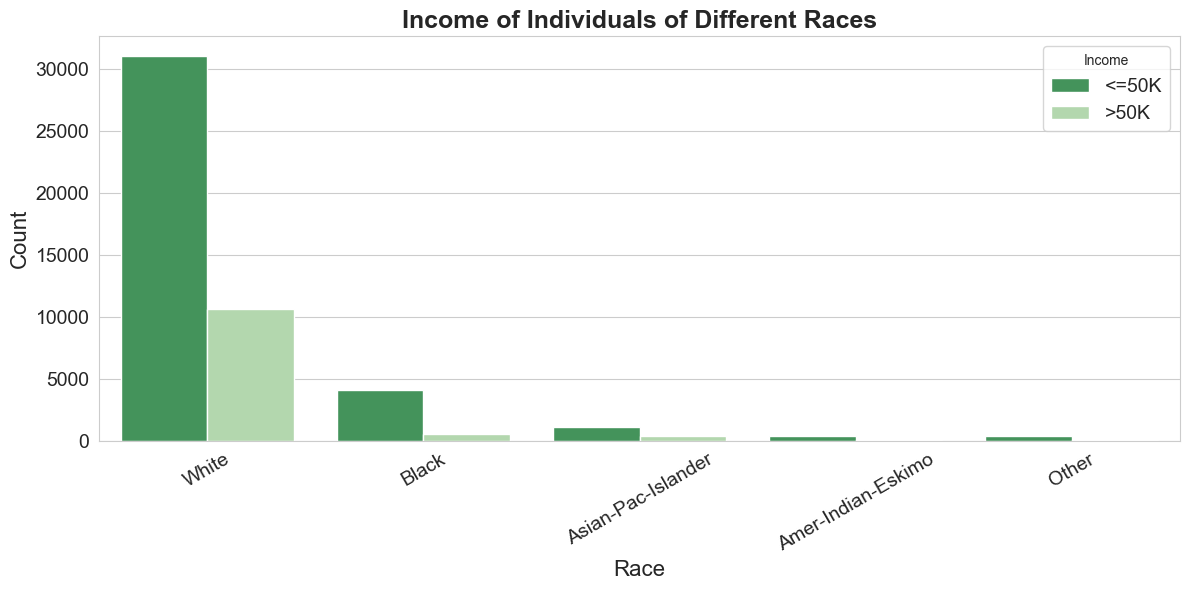

In [363]:
#income distribution of individuals across different races
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='race', hue='income', palette='Greens_r')

plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xlabel('Race', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation:
An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

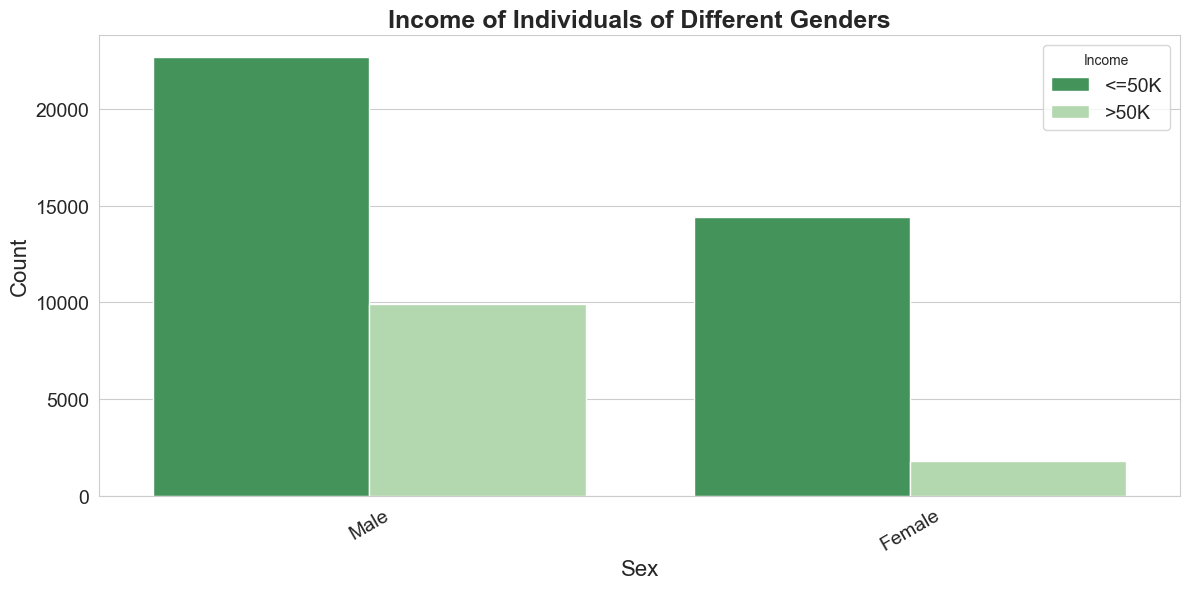

In [364]:
#income distribution of individuals across different genders
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='sex', hue='income', palette='Greens_r')

plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=30) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.tight_layout() 
plt.show()

Observation:
- For Females, there are less than 10% of the adults earning more than 50K dollars an year.
- In case of Males there are close to 33% of them earning more than 50K dollars an year.

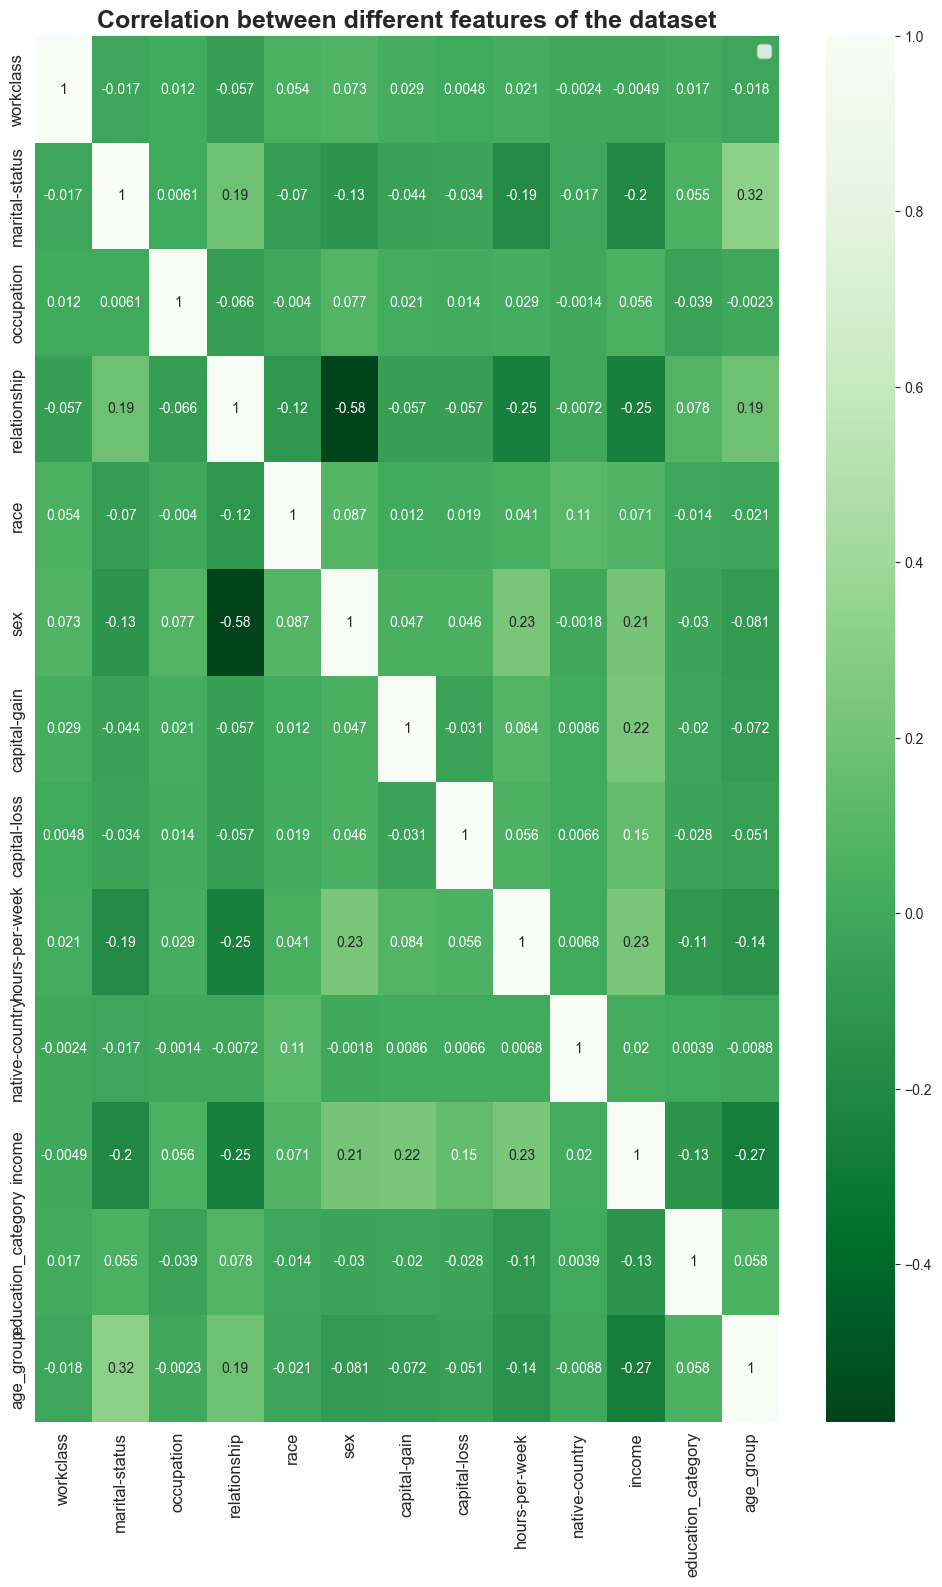

In [365]:
#correlation analysis
plt.figure(figsize = (12,18))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df1.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

Observation: We have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features. We see that most of the features are positively correlated with the Income Variable.

**Statistical tests for EDA**

In [366]:
#chi-square test of independence to know the relationship between workclass and income
contingency_table = pd.crosstab(df['workclass'], df['income'])

stat, p, dof, expected = chi2_contingency(contingency_table)
if p > 0.05:
    print("There is no significant association between workclass and income")
else:
    print("There is a significant association between workclass and income")

There is a significant association between workclass and income


Observation: The significant p-value (typically p < 0.05) indicates that there is a relationship between workclass and income. This means that the distribution of income categories is not the same across different workclasses.

In [367]:
#encode income as numerical values
income_mapping = {'<=50K': 0, '>50K': 1}
df['income_numeric'] = df['income'].map(income_mapping)

#mean income by workclass
mean_income_by_workclass = df.groupby('workclass')['income_numeric'].mean().reset_index()
mean_income_by_workclass.columns = ['Workclass', 'Mean Income']

#median income by workclass
median_income_by_workclass = df.groupby('workclass')['income_numeric'].median().reset_index()
median_income_by_workclass.columns = ['Workclass', 'Median Income']

print("Mean Income by Workclass:")
print(mean_income_by_workclass)

print("\nMedian Income by Workclass:")
print(median_income_by_workclass)

Mean Income by Workclass:
          Workclass  Mean Income
0       Federal-gov     0.389313
1         Local-gov     0.291170
2      Never-worked     0.000000
3           Private     0.209337
4      Self-emp-inc     0.555298
5  Self-emp-not-inc     0.270853
6         State-gov     0.252306
7       Without-pay     0.060606

Median Income by Workclass:
          Workclass  Median Income
0       Federal-gov            0.0
1         Local-gov            0.0
2      Never-worked            0.0
3           Private            0.0
4      Self-emp-inc            1.0
5  Self-emp-not-inc            0.0
6         State-gov            0.0
7       Without-pay            0.0


Observation:
- There is a notable disparity in income levels across different workclass categories. Self-employed individuals with income tend to earn significantly more than those in other workclass categories.
- Individuals in government roles (both federal and local) show relatively higher average incomes compared to private sector workers, which might reflect stable employment and possibly better benefits.
- Self-employment, particularly when income is generated, tends to correlate with higher earnings. This could be due to the nature of work, flexibility, or potential for higher revenue compared to traditional employment.
- The categories Never-worked and Without-pay reflect low-income levels, aligning with expectations as these groups would not have substantial income.

In [368]:
#T- test for two groups (comparing hours-per-week between males and females)
group1 = df[df['sex'] == 'Male']['hours-per-week']
group2 = df[df['sex'] == 'Female']['hours-per-week']

# Perform independent T-test
stat, p = ttest_ind(group1, group2)
if p > 0.05:
    print("There is no significant difference between groups")
else:
    print("There is a significant difference between groups")

There is a significant difference between groups


Observation: The T-test indicated a significant difference between the average hours worked per week by males and females. This means that the average hours worked by one gender differs from the other in a statistically meaningful way.

## **Models** ##

**Collinearity:**
Based on the above correlation matrix, it does not show any values greater than 0.8 or less than -0.8 among the independent variables, it suggests that there is no significant multicollinearity among these variables.
The independent variables are relatively independent of one another. This is a good sign, as it indicates that each predictor contributes unique information to the model without redundancy.

**Feature Engineering:** Created meaningful features like age-group and education-category, encoded categorical variables and handled missing data in workclass and occupation columns as part of data preprocessing which can help our model learn more effectively.

**Oversampling to balance the data by using SMOTE method**

In [369]:
X = adultDataFrame_encoded.drop(columns=['income'])  # Features
y = adultDataFrame_encoded['income']  # Target variable

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize SMOTE
smote = SMOTE(random_state=42)

#apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#check the distribution after oversampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

#convert the resampled data back into a DataFrame
X_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['income'])

# Combine the features and target into a single DataFrame
adultDataFrame_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)


Before SMOTE: income
0    29659
1     9373
Name: count, dtype: int64
After SMOTE: income
0    29659
1    29659
Name: count, dtype: int64


**Building Models**

In [370]:
X = adultDataFrame_resampled[['workclass', 'marital-status', 'occupation', 'relationship', 'race',
                               'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                               'native-country', 'education_category', 'age_group',]]
y = adultDataFrame_resampled['income']
   
# Function to scale data for specific models
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to train and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=[]):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGB Boosting': XGBClassifier(),
        'SVM': SVC(),
        'Neural Network':MLPClassifier(),
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }
    
    results = {}

    for model_name, model in models.items():
        # Scale input if the model is in the list of scale_models
        if model_name in scale_models:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Store the results
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision
        }

        # Print classification report
        print(f"{model_name} Classification Report:\n")
        print(classification_report(y_test, y_pred))
        print('-' * 60)

    return results

# Function to display results
def display_results(results):
    results_df = pd.DataFrame(results).T
    print("\nOverall Model Performance:")
    print(results_df)

# Main function to execute the process
def main(adultDataFrame):
   
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the data for models that require it (SVM, KNN)
    global X_train_scaled, X_test_scaled
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    # Evaluate models
    scale_models = ['SVM', 'K-Nearest Neighbors']
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=scale_models)
    
    # Display the results
    display_results(results)


main(adultDataFrame_resampled)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      8909
           1       0.74      0.77      0.75      8887

    accuracy                           0.75     17796
   macro avg       0.75      0.75      0.75     17796
weighted avg       0.75      0.75      0.75     17796

------------------------------------------------------------
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8909
           1       0.84      0.89      0.86      8887

    accuracy                           0.86     17796
   macro avg       0.86      0.86      0.86     17796
weighted avg       0.86      0.86      0.86     17796

------------------------------------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      

**Hyperparameter Tuning**

In [371]:
import warnings
warnings.filterwarnings('ignore')
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# Define classifiers and their hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }),
    
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    
    'XGB Boosting': (XGBClassifier(eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    
    'SVM': (SVC(), {
        'C': [0.01, 0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    }),
    
    'Neural Network': (MLPClassifier(max_iter=1000), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'learning_rate': ['constant', 'adaptive']
    }),
    
    'Naive Bayes': (GaussianNB(), {}),  # No hyperparameters to tune
    
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    })
}
# Perform hyperparameter tuning
best_models = {}
for model_name, (model, params) in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Define GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8720

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best accuracy for Decision Tree: 0.8680

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy for Random Forest: 0.9020

Tuning hyperparameters for XGB Boosting...
Best parameters for XGB Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best accuracy for XGB Boosting: 0.9110

Tuning hyperparameters for SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy for SVM: 0.8740

Tuning hyperparameters for Neural Network...
Best parameters for Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning

Choosing the best parameters from above results and running the models.

In [372]:
X = adultDataFrame_resampled[['workclass', 'marital-status', 'occupation', 'relationship', 'race',
                               'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                               'native-country', 'education_category', 'age_group',]]
y = adultDataFrame_resampled['income']
   
# Function to scale data for specific models
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to train and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=[]):
    models = {
        'Logistic Regression': LogisticRegression(C= 0.1, solver= 'liblinear'),
        'Decision Tree': DecisionTreeClassifier(criterion = 'entropy',max_depth = 30, min_samples_split = 2),
        'Random Forest': RandomForestClassifier(max_depth = 30, min_samples_split = 2, n_estimators = 100),
        'XGB Boosting': XGBClassifier(learning_rate = 0.2, max_depth = 5, n_estimators = 50),
        'SVM': SVC(C = 10, gamma = 'scale', kernel = 'linear'),
        'Neural Network':MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50,), learning_rate = 'adaptive'),
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
    }
    
    results = {}
    predictions = {}

    for model_name, model in models.items():
        # Scale input if the model is in the list of scale_models
        if model_name in scale_models:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Store the results
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision
        }
        predictions[model_name] = y_pred
        # Print classification report
        print(f"{model_name} Classification Report:\n")
        print(classification_report(y_test, y_pred))
        print('-' * 60)

    return results

# Function to display results
def display_results(results):
    results_df = pd.DataFrame(results).T
    print("\nOverall Model Performance:")
    print(results_df)

# Main function to execute the process
def main(adultDataFrame):
   
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the data for models that require it (SVM, KNN)
    global X_train_scaled, X_test_scaled
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    # Evaluate models
    scale_models = ['SVM', 'K-Nearest Neighbors']
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=scale_models)
    
    # Display the results
    display_results(results)


main(adultDataFrame_resampled)

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      8909
           1       0.74      0.77      0.75      8887

    accuracy                           0.75     17796
   macro avg       0.75      0.75      0.75     17796
weighted avg       0.75      0.75      0.75     17796

------------------------------------------------------------
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8909
           1       0.84      0.89      0.86      8887

    accuracy                           0.86     17796
   macro avg       0.86      0.86      0.86     17796
weighted avg       0.86      0.86      0.86     17796

------------------------------------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      

Random Forest and Neural Network show significant improvements after hyperparameter tuning. XGB Boosting and SVM exhibit declines, suggesting that the tuning may have led to worse performance for these models.

## **Results and Analysis** ##

**Summary of Results**

- In this study, we evaluated multiple classification models to predict income levels from the Adult dataset. The following models were considered: Logistic Regression, Decision Tree, Random Forest, XGBoosting, Support Vector Machine (SVM), Neural Network, Naive Bayes, and K-Nearest Neighbors (KNN). Each model was assessed using cross-validation, followed by hyperparameter tuning to enhance performance. 
- Based on the overall perfromance metrics, **Random Forest** has the highest accuracy (0.88) and an excellent balance between precision (0.85) and recall (0.91). This indicates that it is performing well in terms of both correctly identifying positive cases and minimizing false negatives

**Statistics Summary**

In [373]:
numerical_summary = df.groupby('age-group').agg({
    'hours-per-week': ['count', 'mean', 'std', 'min', 'max'],
    'capital-gain': ['mean', 'std', 'min', 'max'],
    'capital-loss': ['mean', 'std', 'min', 'max']
})

print("Numerical Summary Statistics by Age Group:\n", numerical_summary)

Numerical Summary Statistics by Age Group:
             hours-per-week                               capital-gain  \
                     count       mean        std min max         mean   
age-group                                                               
Adult                24212  43.138815  10.672680   1  80  1560.117917   
Senior                3605  33.075173  15.370134   1  80  1705.626075   
Teen                  2500  26.609200  12.016415   0  80    99.004800   
Young Adult          18473  39.940454  11.153125   0  80   461.968928   

                                    capital-loss                        
                     std min    max         mean         std min   max  
age-group                                                               
Adult        9168.854955   0  99999   106.918057  444.376208   0  3900  
Senior       8795.539671   0  99999   106.106796  467.286472   0  4356  
Teen         1446.937618   0  34095    38.912000  253.212415   0  2129  
Young 

Work Hours: Older age groups (Adults and Seniors) tend to work more hours compared to Teens and Young Adults, likely due to different life stages and career commitments.
Capital Gains and Losses: Capital gains are generally higher among older individuals, reflecting more established investments. Teens and Young Adults show lower capital gains, which aligns with their limited work experience and investment activity. Capital losses are relatively low across all groups, indicating that many individuals do not face significant financial setbacks from their investments.

**Metrics**

- Accuracy: While accuracy provides a straightforward measure of overall model performance, it can still be misleading in the context of the Adult dataset due to potential class imbalances between income groups. However, we balanced the data for both classes (income 0 and 1), accuracy becomes a meaningful metric to assess the model’s effectiveness in predicting income levels accurately.
- Precision: Precision is particularly significant in the Adult dataset where the cost of false positives (incorrectly predicting a higher income) can lead to misguided decisions in areas like financial lending or job recruitment. A high precision score indicates that when the model predicts an individual has a higher income, it is more likely to be correct, which is essential for avoiding costly misclassifications.
- Recall: In the context of the Adult dataset, recall is crucial as it reflects the model's ability to identify individuals who earn a higher income. Missing these positive cases (i.e., misclassifying high-income individuals as low-income) could lead to underrepresentation in targeted marketing or policy-making. High recall ensures that most actual high-income individuals are captured, which is vital for organizations aiming to reach these demographics effectively.
- F1-score: The F1-score is particularly valuable in the Adult dataset as it offers a balance between precision and recall, allowing for a comprehensive understanding of the model's performance. In situations where there is a trade-off between identifying high-income individuals (recall) and minimizing false positives (precision), the F1-score provides insight into the model’s overall effectiveness in distinguishing between income classes. This is critical for ensuring that both positive identification of high-income earners and the accuracy of those predictions are maintained.

**Evaluation Process**

The iterative process of training and evaluation led to significant improvements in model performance, particularly through techniques like cross-validation and hyperparameter tuning. This comprehensive approach enhanced both the interpretability and performance of the final model.

**Comparision of Models**

- Random Forest and XGB Boosting demonstrate superior performance across all metrics, indicating robustness in classification tasks. Their ability to handle non-linear relationships and interactions among features likely contributes to their higher performance.
- Neural Networks show decent performance but are outperformed by tree-based models, likely due to the complexity of training and potential overfitting if not tuned correctly.
- Naive Bayes, despite having a high precision for class 1, has a poor recall, suggesting it is conservative in its predictions and misses many positive instances. This can be detrimental in applications where detecting the positive class is critical.
- Logistic Regression and SVM perform at the lower end of the accuracy spectrum, indicating that linear models may not adequately capture the complexities of the dataset.

## **Discussion and Conclusion** ##

**Learning and Takeaways**

- Algorithm Performance: The Random Forest and XGBoost models performed significantly better than others, with accuracy rates exceeding 87%. This underscores the importance of leveraging ensemble methods in classification tasks, as they tend to mitigate overfitting and improve generalization to unseen data.
- Model Evaluation Metrics: The careful consideration of precision, recall, and F1-score provided a more comprehensive understanding of model performance beyond mere accuracy. This was particularly relevant given the near balance in class distributions, where these metrics revealed the trade-offs between false positives and false negatives.

**Challenges and Limitations**

- Some models, like Naive Bayes, underperformed significantly, primarily due to the independence assumption that does not hold true for all feature relationships in the dataset. This highlights the necessity of selecting appropriate models based on the underlying data characteristics.
- The decision tree classifier, while interpretable, exhibited signs of overfitting, indicated by a high training accuracy relative to the test accuracy. This suggests that simpler models may benefit from regularization techniques or more robust validation strategies to enhance generalizability.

Overall, this project not only achieved its initial goals but also provided valuable lessons about the intricacies of model selection and the significance of comprehensive evaluation metrics.